# kNN
Implementation of the kNN algorithm using the famous iris dataset.

## Reading the dataset

In [1]:
import  pandas as pd

df = pd.read_csv("data\iris.csv",header=None)

In [59]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Splitting the dataset to train and test

In [68]:
from sklearn.model_selection import train_test_split

x_data = df.drop(labels=[4], axis=1)
y_data = df[4]

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=20, 
                                                    random_state=0)

In [69]:
x_train.count()

0    130
1    130
2    130
3    130
dtype: int64

In [74]:
y_train.head()

121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
Name: 4, dtype: object

## Running KNN
Lets first try using the sklearn implementation of the algorithm and test it with our data.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
print(knn.predict(x_test[:1]), y_test[:1]) 

['Iris-virginica'] 114    Iris-virginica
Name: 4, dtype: object


In [8]:
y_predict = knn.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy

1.0

## Implementing KNN
Now, let's try implementing the algorithm ourselves. 

### Calculating eucludian distance

We have to create a function for calculating the distance from one sample to another. 
We'll use the Euclidian distance:
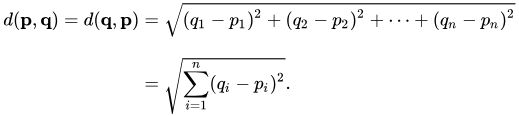

#### Using the numpy's implementation

In [134]:
import numpy
from numpy import linalg as LA
dist = numpy.linalg.norm(x_train[0:1].iloc[0] - x_test[0:1].iloc[0])

In [135]:
dist

0.4898979485566353

#### Implementing our own

In [248]:
import numpy as np

def euclideanDistance(trainRow, testRow):
    distance = 0
    for columnName, value in trainRow.iteritems():
        distance += np.square(trainRow[columnName] - testRow[columnName])
    return np.sqrt(distance)


## Another attempt

#def euclideanDistance(trainRow, testRow):
#    distance = 0
#    for column in testRow:
#        distance += np.square(trainRow[column].iloc[0] - testRow[column].iloc[0])
#    return np.sqrt(distance)

#euclideanDistance(x_train[0:1], x_test[0:1])

In [313]:
euclideanDistance(x_train[0:1].iloc[0], x_test[0:1].iloc[0])

0.4898979485566353

Great! Results are the same.

### Implementing KNN
For our KNN implementation we are calculating the distance from our test sample to each of the training samples. Next we take the *k* smallest distances and as a result we return the most commonly occuring label.

In [417]:
# Function returing the most common element in a collection
def mostCommon(elements):
    occurences = {}
    for element in elements:
        if (element in occurences):
            occurences[element] += 1
        else:
            occurences[element] = 1
    mostCommonElement = sorted(occurences.items(), key=lambda kv: kv[1], reverse=True)[0][0]
    return mostCommonElement

def knn(x_train, y_train, testRow, k):
    
    distances = {}
    kClosestYs = []
    counter = 0;
    
    #calculate distance to each row of the training dataset
    for index, row in x_train.iterrows():
        distances[counter] = euclideanDistance(row, testRow)
        counter+=1;

    #sort distances ascending
    sortedDistances = sorted(distances.items(), key=lambda kv: kv[1])
    
    #take the k best distances and save their labels
    for i in range(0, k):
        trainSampleIndex = sortedDistances[i][0]
        kClosestYs.append(y_train.iloc[trainSampleIndex])
    
    #take the most frequently occurring
    mostFrequentlyOccuringLabel = mostCommon(kClosestYs)
    
    return mostFrequentlyOccuringLabel

In [421]:
prediction = knn(x_train, y_train, x_test[0:1].iloc[0], 4)
prediction

'Iris-virginica'

### Testing
After we have implemented our own kNN, we are going to make a prediction for each of the test samples and compare the results to the actual values.

In [453]:
#Save predictions for all test samples

predictions = []

for index, testRow in x_test.iterrows():
    prediction = knn(x_train, y_train, testRow, 4)
    predictions.append(prediction)
    

#Calculate correct percentage
correctCount = 0
for i in range(0, len(predictions)):
    if (predictions[i] == y_test.iloc[i]):
        correctCount += 1

accuracy = 100 * float(correctCount)/float(len(predictions))

#Print accuracy
print('Accuracy:', accuracy, '%')


Accuracy: 100.0 %
